In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('CarPricePrediction.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [36]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [37]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [38]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


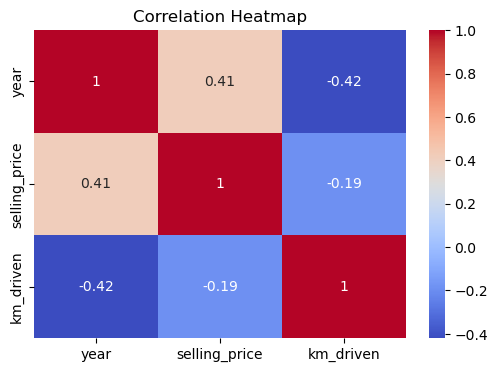

In [41]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

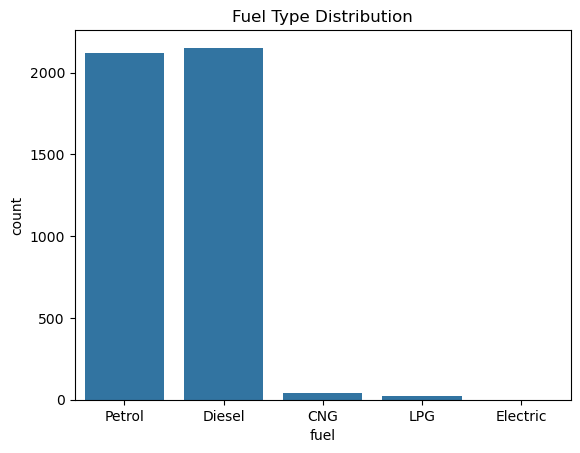

In [43]:
sns.countplot(x=df['fuel'])
plt.title("Fuel Type Distribution")
plt.show()

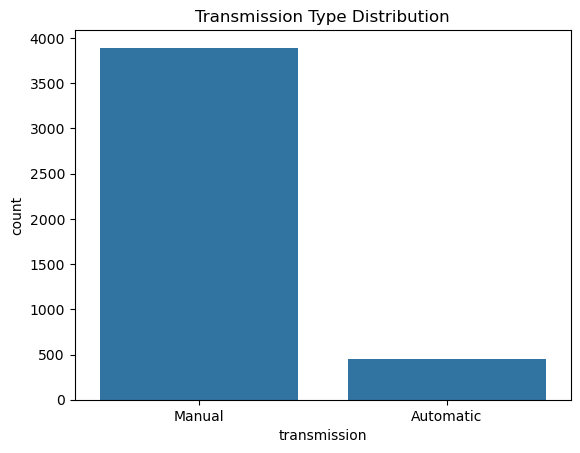

In [44]:
sns.countplot(x=df['transmission'])
plt.title("Transmission Type Distribution")
plt.show()

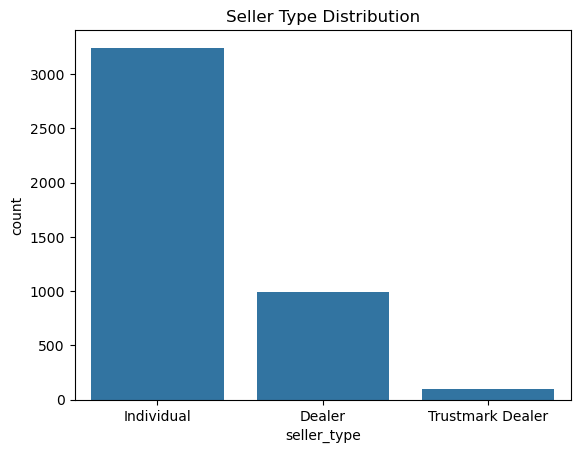

In [45]:
sns.countplot(x=df['seller_type'])
plt.title("Seller Type Distribution")
plt.show()

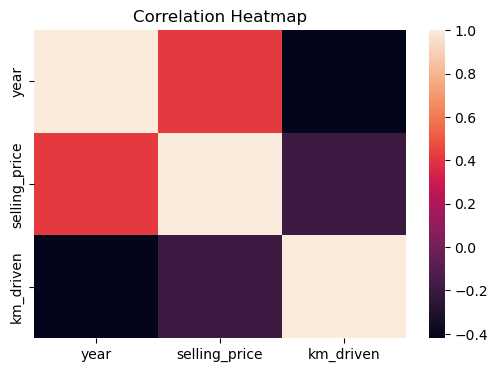

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['year', 'selling_price', 'km_driven']].corr())
plt.title("Correlation Heatmap")
plt.show()

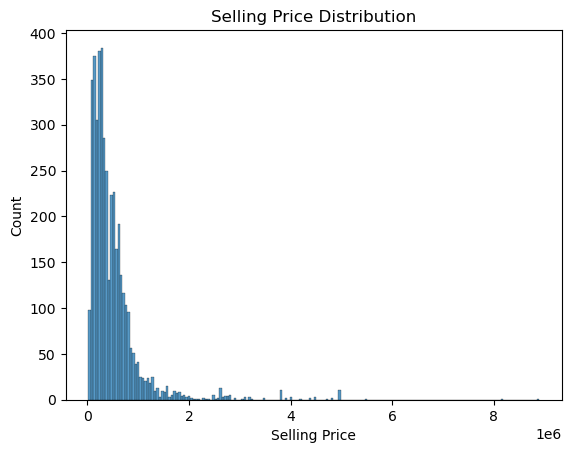

In [49]:
plt.figure()
sns.histplot(df['selling_price'])
plt.title("Selling Price Distribution")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()


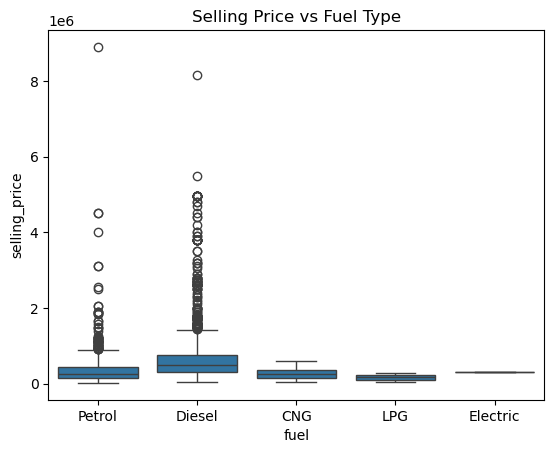

In [50]:
plt.figure()
sns.boxplot(x=df['fuel'], y=df['selling_price'])
plt.title("Selling Price vs Fuel Type")
plt.show()

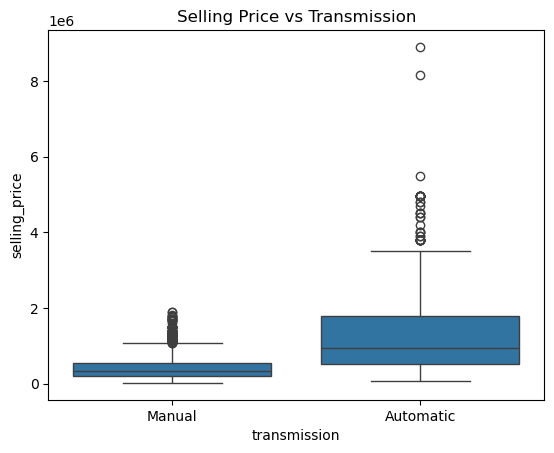

In [51]:
plt.figure()
sns.boxplot(x=df['transmission'], y=df['selling_price'])
plt.title("Selling Price vs Transmission")
plt.show()

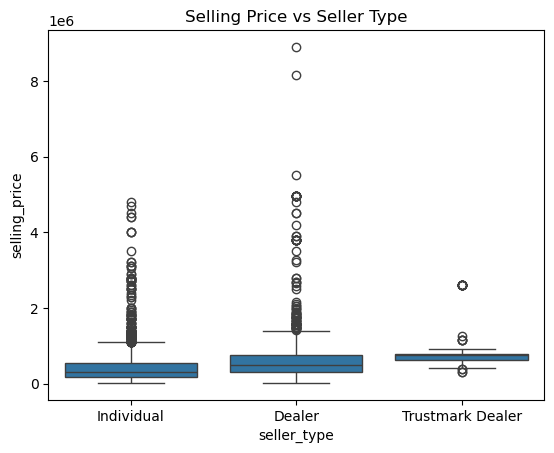

In [52]:
plt.figure()
sns.boxplot(x=df['seller_type'], y=df['selling_price'])
plt.title("Selling Price vs Seller Type")
plt.show()

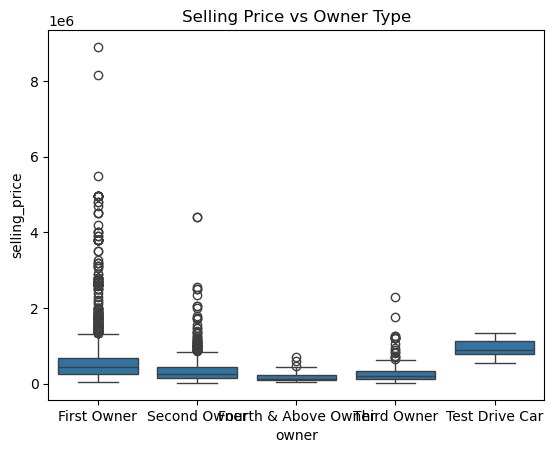

In [53]:
plt.figure()
sns.boxplot(x=df['owner'], y=df['selling_price'])
plt.title("Selling Price vs Owner Type")
plt.show()

In [106]:
X = df.iloc[:, [0, 1, 3, 4, 5,6,7]]
y = df.iloc[:, 2] 

In [107]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

In [101]:
y_test

3978    12.013707
1448    12.429220
2664    11.695255
17      13.017005
1634    13.500801
          ...    
3468    11.775297
3164    12.765691
416     11.918397
1616    13.384729
2480    13.262127
Name: selling_price, Length: 868, dtype: float64

In [102]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.36006920754873406


In [103]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.2269159704367208


In [104]:
print('R2 Score',r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2 Score 0.6709635479274084


In [105]:
print('RMSE',np.sqrt(mse))


RMSE 0.476356977944819


In [108]:
print(model.coef_)

[ 1.14209744e-01 -3.65366694e-07  5.45282850e-01  1.62023741e-01
 -1.14047450e-01  4.11223531e-02 -1.55345879e-01  3.38292259e-01
 -8.11177021e-01 -1.31385704e-01 -3.81163454e-02  1.54786317e-01
 -9.11268284e-02]


In [109]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print("Training R2 Score:", train_r2)
print("Test R2 Score:", test_r2)


Training R2 Score: 0.6896339122812307
Test R2 Score: 0.6709635479274084
